### Arbeidskrav 6
     kostnadsminimering

**Basic Setup**

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from mpmath import findroot
from sympy.solvers import solve
from IPython.display import Markdown

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab


# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


In [74]:
# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

#### Oppgave
I tillegg til faktorkostnaden har denne bedriften en fast kostnad på 10 000 NOK. Finn et uttrykk for total produksjonskostnad for X enheter produkt. Bruk dette uttrykket til å lage en funksjon som angir gjennomsnittskostnad (AC) på lang sikt. Tegn AC funksjonen ved å sette din funksjonen inn i koden nedenfor.

$f(N,K)=N^{0.5}K^{0.5}, w=350, r=500, x_0=10.$

In [313]:
N , K, w, r, X, lambda_ =sp.symbols('N K w r X lambda', real=True, positive=True)

def ProductionFunction(N,K):
    return N**0.5*K**0.5

#def Constraint(X, production_function):
#    constraint = X - production_function
#    return constraint

def TotalVaribalCost(w,N,r,K):
    return w*N+r*K

In [319]:
def MTSB():    
    df_dN = sp.diff(ProductionFunction(N,K),N)
    df_dK = sp.diff(ProductionFunction(N,K),K)
    solution = df_dN/df_dK
    
    return solution

MTSB()

1.0*K**1.0/N**1.0

In [196]:
def Cost_per_unit(x_0,X,r,w):
    prod=ProductionFunction(N,K).subs(K, w*N/r)
    opt_N = sp.solve(prod-x_0, N)
    unit=sp.solve([ProductionFunction(N,K)-X, K-(w/r)*N], K,N)
    unit = unit[0]
    return TotalVaribalCost(w,unit[1],r,unit[0])


836.660026534076*X

In [264]:
FC = 10_000
#TVC = Cost_per_unit(10,X,500,350)
#TC = FC+TVC
def AvarageCost(Units,TVC,FC,TVC_Type = "Expr"):
    if TVC_Type == "Expr":
        TVC_func = sp.lambdify(X,TVC)
        TVC_func = TVC_func(Units)
    else:
        TVC_func = TVC
    TC = TVC_func+FC
    AC = TC/Units
    return AC

#AvarageCost(10,Cost_per_unit(10,X,500,350),FC)
#AvarageCost(10,C(X,K),FC)

In [ ]:
#AC_Function = sp.lambdify(X,AC)

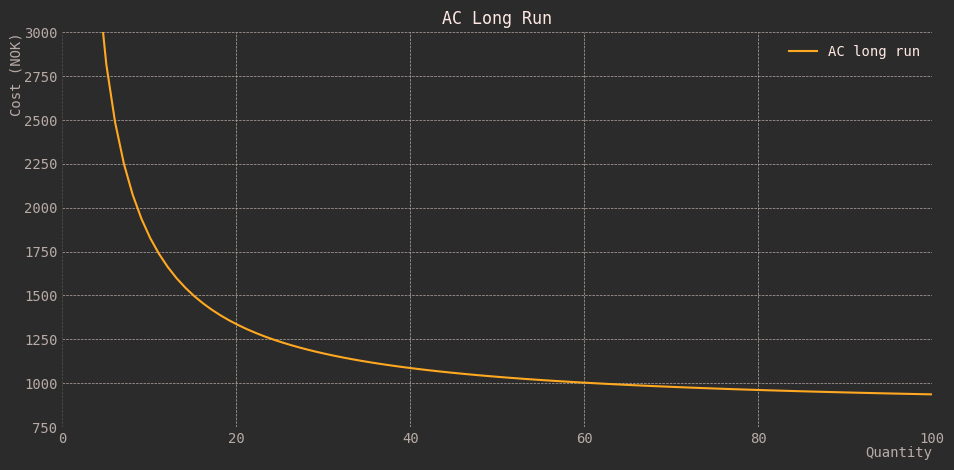

In [317]:
graph_Xmin = 0
graph_Xmax = 100
graph_Ymin = 750
graph_Ymax = 3000

x_num=np.linspace(0.001,100, 100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Cost (NOK)',
                     lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)],
)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.plot(x_num,AvarageCost(x_num,Cost_per_unit(10,X,500,350),FC), label='AC long run')

ax.set_title('Production Cost')
ax.legend(loc='best',frameon=False,ncol=2,prop={'size': 8});

# tittel
ax.set_title('AC Long Run')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave fortsetter**      
*I forelesning 9 har dere allerede funnet et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(X, K_0)=10000 + 500K_0 +\frac{350X^2}{K_0}$. Beregn den totale gjennomsnittskostnaden, og plott dette inn i figuren for $K=10, K=25, K=50$ sammen med AC på lang sikt. Bruk figuren til å forklare forholdet mellom gjennomsnittskostnaden på kort og lang sikt.*

In [266]:
def C(X,K):
    return 10_000+500*K+((350*X**2)/K)

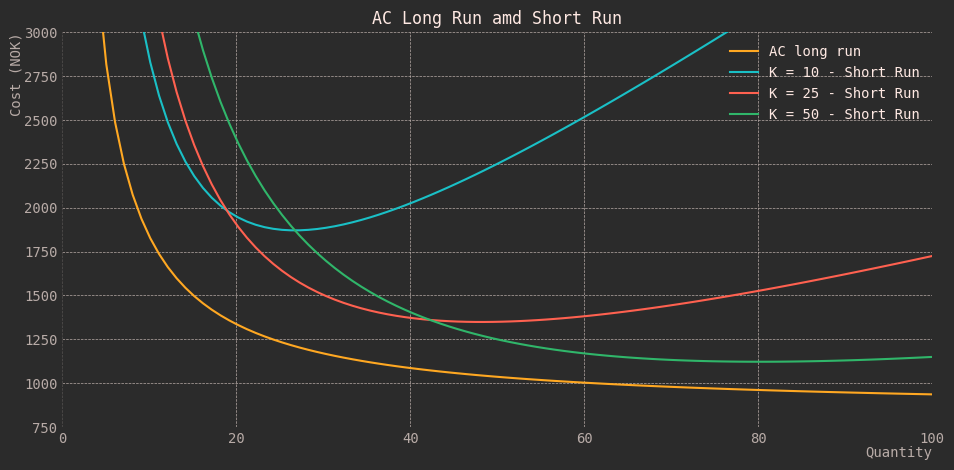

In [318]:
# skriv ditt svar her

ax.plot(x_num,AvarageCost(x_num,C(x_num,10),FC,TVC_Type = "Func"), label='K = 10 - Short Run')
ax.plot(x_num,AvarageCost(x_num,C(x_num,25),FC,TVC_Type = "Func"), label='K = 25 - Short Run')
ax.plot(x_num,AvarageCost(x_num,C(x_num,50),FC,TVC_Type = "Func"), label='K = 50 - Short Run')

ax.legend(loc='best',frameon=False)
ax.set_title('AC Long Run amd Short Run')
fig
